In [1]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imsave
from scipy.stats import norm
import pandas as pd

plt.rcParams['figure.dpi'] = 100

Code for inspecting the valence band- this was NOT used in the publication

In [2]:
vb_65 = imread('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/VB-alighned-tiff/VBEEM_3rd-ox-alighned.tif')
vb_20 = imread('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/VB-alighned-tiff/VBEEM_2nd-ox-alighned-2.tif')
vb_preox = imread('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/VB-alighned-tiff/VBPEEM_pre-ox-not_aligned.tif')

In [3]:
def intensity_filter_px(img:np.ndarray, min:int,max:int):
    max_array = np.amax(img,axis=0)
    goodimage = (max_array > min) & (max_array < max)

    return img*goodimage

In [13]:
vb_preox_filtered = intensity_filter_px(vb_preox, 14000,65535)
#imsave("vb_preox_filtered.tif",vb_preox_filtered.astype(np.uint16))

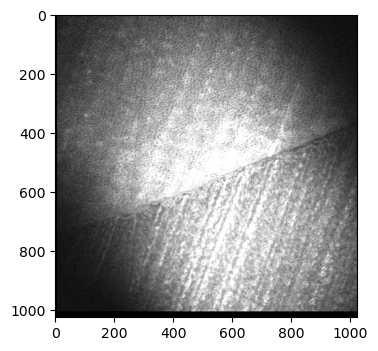

In [12]:
vb_65_filtered = intensity_filter_px(vb_65,10000,60000)
#plt.imshow(vb_65_filtered[16,:,:],cmap='gray')
plt.imshow(vb_65[16,:,:],cmap='gray')
#imsave("vb_65_filtered.tif",vb_65_filtered.astype(np.uint16))

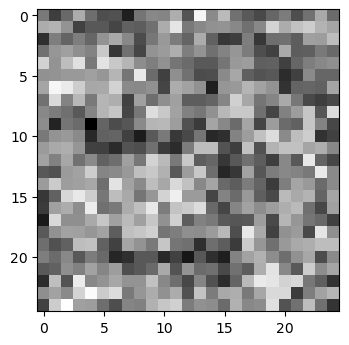

In [72]:
plt.imshow(vb_65[14,200:225,200:225], cmap='gray')
imsave("25x25 cutout.tif",vb_65[:,200:225,200:225].astype(np.uint16))

pixel_list = pd.DataFrame()
for y in range(200,225):
    for x in range(200,225):
        name = 'X:'+str(x)+' Y:'+str(y)
        pixel_list[name] = vb_65[:,y,x]

pixel_list.to_csv('pixel_spectra.csv')


(26, 1024, 1024)
(28,)
(26,)


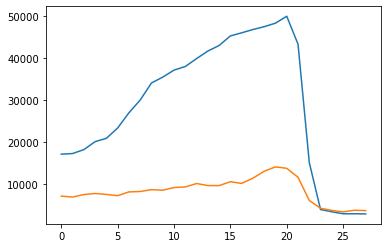

In [24]:
print(vb_20.shape)
bottom = np.average(vb_65[:,700:800,700:800], axis=(1,2))
top = np.average(vb_65[:,250:300,250:300],axis=(1,2))
print(top.shape)
plt.plot(bottom)
plt.plot(top)
xaxis = np.linspace(1,26,26)
print(xaxis.shape)
valence = norm.pdf(xaxis,20,2)
oxygen = norm.pdf(xaxis,13,5)

# plt.plot(oxygen)
# plt.plot(valence)
# plt.plot((oxygen+valence)*80000)
# plt.plot(top)

(1024, 1024)


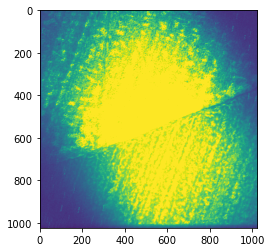

In [17]:
print((np.amin(vb_20,axis=0).shape))
plt.imshow(np.amin(vb_20,axis=0))
plt.imshow(np.amax(vb_20,axis=0))

1.0
(1048576,)


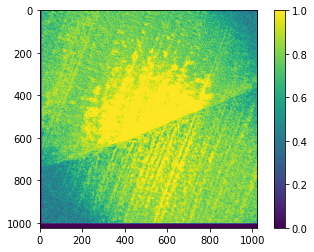

In [18]:
normed = np.divide((vb_20-np.amin(vb_20,axis=0)),(np.amax(vb_20,axis=0)-np.amin(vb_20,axis=0)))
print(np.max(normed))
valence_img = np.dot(valence,normed.reshape(26,1024*1024))
oxygen_img = np.dot(oxygen,normed.reshape(26,1024*1024))
print(valence_img.shape)
plt.imshow(normed[18,:,:])
plt.colorbar()


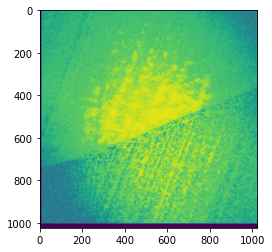

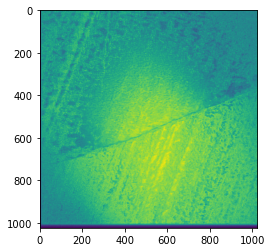

In [20]:
plt.imshow(oxygen_img.reshape(1024,1024))

In [ ]:
def fermi_E_contribution(vb_array):
    fermi_half = np.sum(vb_array[16:,:,:], axis=0)
    lower_half = np.sum(vb_array[:16,:,:], axis=0)
    plt.imshow((lower_half-fermi_half))
    plt.colorbar()


557 0


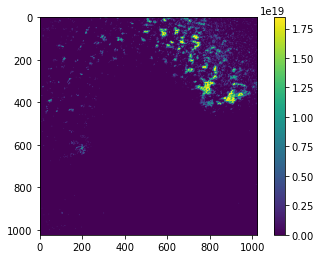

In [ ]:
fermi_E_contribution(vb_20)
fermi_half = np.sum(vb_20[16:,:,:], axis=0)
lower_half = np.sum(vb_20[:16,:,:], axis=0)
print(np.min(lower_half),np.min(fermi_half))

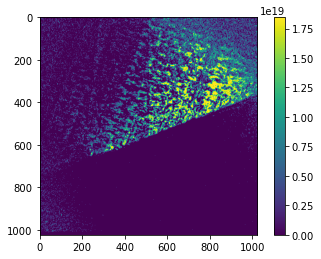

In [ ]:
fermi_E_contribution(vb_65)

True


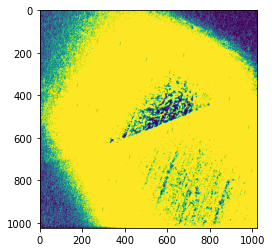

In [ ]:
max_array = np.amax(vb_65,axis=0)
goodimage = (max_array > 10000) & (max_array < 65000)
plt.imshow(goodimage)
print(np.max(goodimage))

filtered_vb_20 = vb_20*goodimage

